# Security Requirements Generation Analysis

This notebook generates charts for thesis sections:
- **6.1.1 Translation Quality Assessment**
- **6.1.2 Standards Compliance Validation**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set style
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("husl")

# Load data
df = pd.read_csv("results.csv")
print(f"Loaded {len(df)} generations")
df.head()

Loaded 14 generations


,generation_name,overall_score,completeness,consistency,correctness,implementability,alignment,validation_passed,total_requirements,reqs_with_threats,...,total_controls,owasp_controls,nist_controls,iso_controls,control_coverage_pct,avg_controls_per_req,critical_controls,asvs_l1_controls,asvs_l2_controls,asvs_l3_controls
0,G-1,0.790,0.75,0.90,0.85,0.65,0.80,False,23,23,...,78,26,29,23,82.6,3.39,22,0,21,5
1,G-2,0.852,0.78,0.90,0.90,0.80,0.88,True,20,20,...,74,22,30,20,90.0,3.70,25,1,21,0
2,G-3,0.880,0.80,0.95,0.90,0.80,0.95,True,20,20,...,79,35,25,19,85.0,3.95,14,21,14,0
3,G-4,0.830,0.72,0.92,0.86,0.70,0.94,True,27,27,...,88,27,34,27,92.6,3.26,19,10,17,0
4,G-5,0.840,0.80,0.90,0.85,0.75,0.90,True,25,25,...,63,20,23,20,72.0,2.52,22,2,16,2


---
## 6.1.1 Translation Quality Assessment

### Chart 1: Overall Quality Scores Across Generations

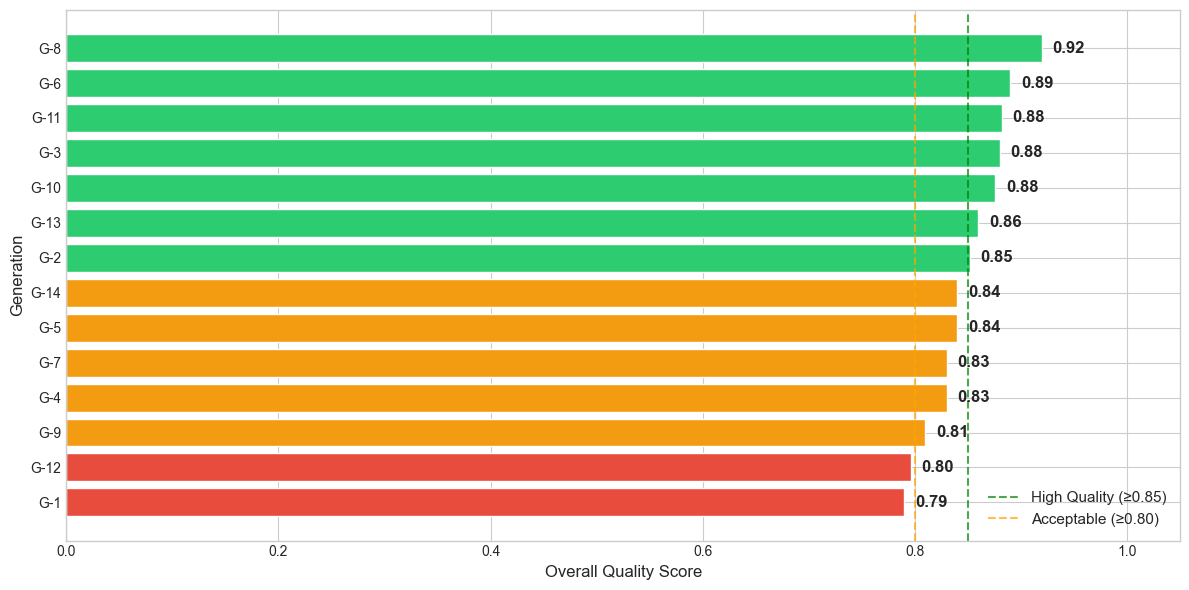

Mean: 0.850, Std: 0.038


In [4]:
fig, ax = plt.subplots(figsize=(12, 6))
df_sorted = df.sort_values("overall_score", ascending=True)
colors = ["#2ecc71" if score >= 0.85 else "#f39c12" if score >= 0.80 else "#e74c3c" for score in df_sorted["overall_score"]]
bars = ax.barh(df_sorted["generation_name"], df_sorted["overall_score"], color=colors, edgecolor="white")
for bar, score in zip(bars, df_sorted["overall_score"]):
    ax.text(score + 0.01, bar.get_y() + bar.get_height() / 2, f"{score:.2f}", va="center", fontsize=12, fontweight="bold")
ax.set_xlabel("Overall Quality Score", fontsize=12)
ax.set_ylabel("Generation", fontsize=12)
# ax.set_title("Translation Quality: Overall Validation Scores", fontsize=14, fontweight="bold")
ax.set_xlim(0, 1.05)
ax.axvline(x=0.85, color="green", linestyle="--", alpha=0.7, label="High Quality (≥0.85)")
ax.axvline(x=0.80, color="orange", linestyle="--", alpha=0.7, label="Acceptable (≥0.80)")
ax.legend(loc="lower right", fontsize=11)
plt.tight_layout()
plt.savefig("chart_01_overall_scores.png", dpi=150, bbox_inches="tight")
plt.show()
print(f'Mean: {df["overall_score"].mean():.3f}, Std: {df["overall_score"].std():.3f}')

### Chart 2: Quality Dimension Scores Distribution

/var/folders/77/vwj32c4j3ll2x5dx40092d040000gn/T/ipykernel_13428/3789636391.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(dim_data, labels=dim_labels, patch_artist=True)


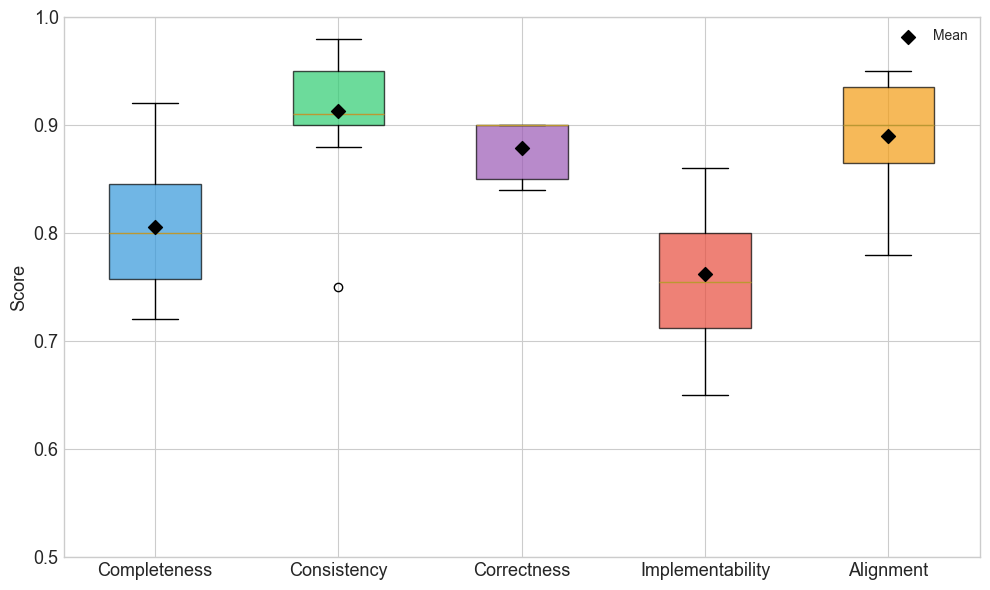

Completeness: mean=0.806, std=0.066
Consistency: mean=0.913, std=0.055
Correctness: mean=0.879, std=0.026
Implementability: mean=0.762, std=0.061
Alignment: mean=0.890, std=0.054


In [5]:
dimensions = ["completeness", "consistency", "correctness", "implementability", "alignment"]
dim_labels = ["Completeness", "Consistency", "Correctness", "Implementability", "Alignment"]
fig, ax = plt.subplots(figsize=(10, 6))
dim_data = [df[dim].dropna() for dim in dimensions]
bp = ax.boxplot(dim_data, labels=dim_labels, patch_artist=True)
colors = ["#3498db", "#2ecc71", "#9b59b6", "#e74c3c", "#f39c12"]
for patch, color in zip(bp["boxes"], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
means = [df[dim].mean() for dim in dimensions]
ax.scatter(range(1, len(dimensions) + 1), means, marker="D", color="black", s=50, zorder=3, label="Mean")
ax.set_ylabel("Score", fontsize=13)
ax.tick_params(axis="x", labelsize=13)
ax.tick_params(axis="y", labelsize=13)

# ax.set_title("Quality Dimension Scores Distribution", fontsize=14, fontweight="bold")
ax.set_ylim(0.5, 1.0)
ax.legend()
plt.tight_layout()
plt.savefig("chart_02_dimension_scores.png", dpi=150, bbox_inches="tight")
plt.show()
for dim, label in zip(dimensions, dim_labels):
    print(f"{label}: mean={df[dim].mean():.3f}, std={df[dim].std():.3f}")

### Chart 3: Requirements Coverage Metrics (Traceability)

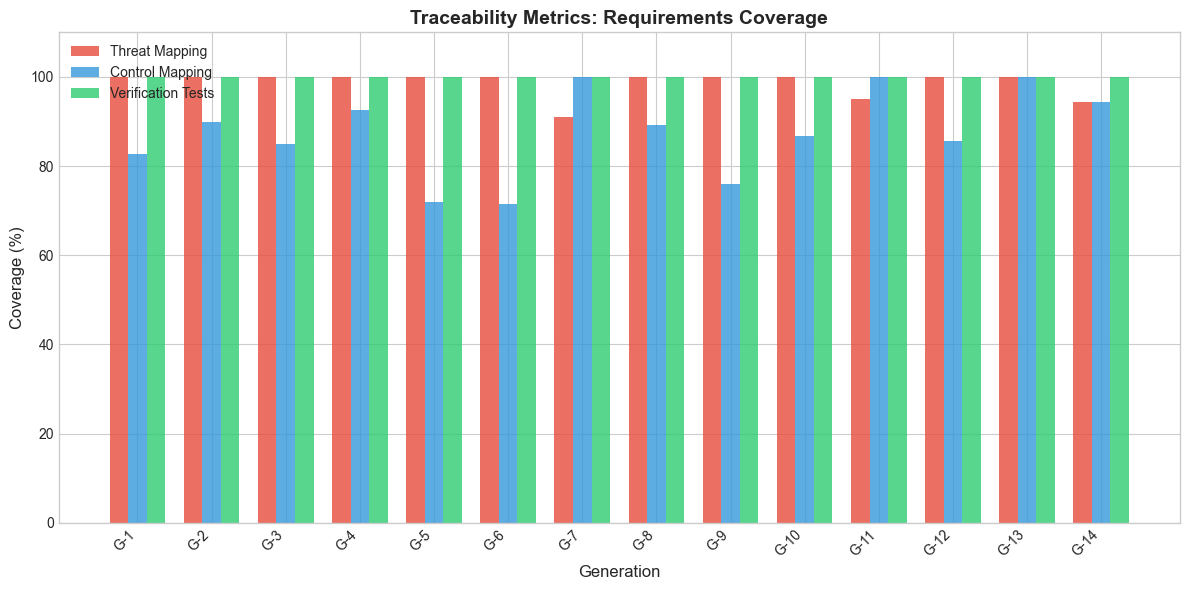

Avg Threat Coverage: 98.6%
Avg Control Coverage: 87.6%
Avg Test Coverage: 100.0%


In [18]:
fig, ax = plt.subplots(figsize=(12, 6))
df["threat_coverage_pct"] = df["reqs_with_threats"] / df["total_requirements"] * 100
df["control_coverage_pct_calc"] = df["reqs_with_controls"] / df["total_requirements"] * 100
df["test_coverage_pct"] = df["reqs_with_tests"] / df["total_requirements"] * 100
x = np.arange(len(df))
width = 0.25
df_sorted = df.sort_values("generation_name", key=lambda x: x.str.extract(r"(\d+)")[0].astype(int))
ax.bar(x - width, df_sorted["threat_coverage_pct"], width, label="Threat Mapping", color="#e74c3c", alpha=0.8)
ax.bar(x, df_sorted["control_coverage_pct_calc"], width, label="Control Mapping", color="#3498db", alpha=0.8)
ax.bar(x + width, df_sorted["test_coverage_pct"], width, label="Verification Tests", color="#2ecc71", alpha=0.8)
ax.set_xlabel("Generation", fontsize=12)
ax.set_ylabel("Coverage (%)", fontsize=12)
ax.set_title("Traceability Metrics: Requirements Coverage", fontsize=14, fontweight="bold")
ax.set_xticks(x)
ax.set_xticklabels(df_sorted["generation_name"], rotation=45, ha="right")
ax.legend()
ax.set_ylim(0, 110)
plt.tight_layout()
plt.savefig("chart_03_coverage_metrics.png", dpi=150, bbox_inches="tight")
plt.show()
print(f'Avg Threat Coverage: {df["threat_coverage_pct"].mean():.1f}%')
print(f'Avg Control Coverage: {df["control_coverage_pct_calc"].mean():.1f}%')
print(f'Avg Test Coverage: {df["test_coverage_pct"].mean():.1f}%')

### Chart 4: Breadth vs Depth Analysis

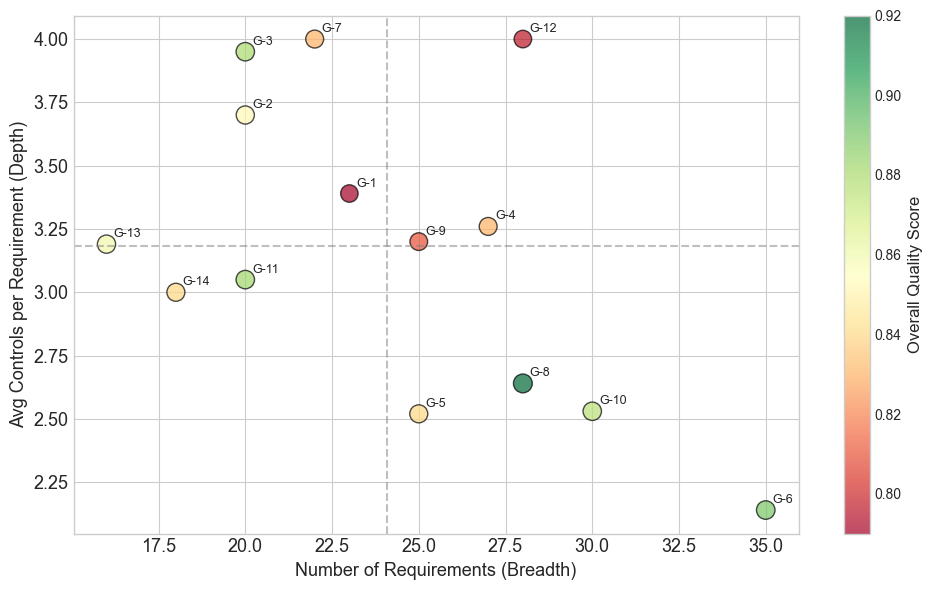

Breadth (Requirements): mean=24.1, range=16-35
Depth (Controls/Req): mean=3.18


In [7]:
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(
    df["total_requirements"],
    df["avg_controls_per_req"],
    c=df["overall_score"],
    cmap="RdYlGn",
    s=df["overall_score"] * 200,
    alpha=0.7,
    edgecolors="black",
)
for idx, row in df.iterrows():
    ax.annotate(
        row["generation_name"],
        (row["total_requirements"], row["avg_controls_per_req"]),
        xytext=(5, 5),
        textcoords="offset points",
        fontsize=9,
    )
ax.set_xlabel("Number of Requirements (Breadth)", fontsize=13)
ax.set_ylabel("Avg Controls per Requirement (Depth)", fontsize=13)
# ax.set_title("Breadth vs Depth: Requirements Coverage Trade-off", fontsize=14, fontweight="bold")
ax.tick_params(axis="x", labelsize=13)
ax.tick_params(axis="y", labelsize=13)
cbar = plt.colorbar(scatter)
cbar.set_label("Overall Quality Score", fontsize=12)
ax.axvline(x=df["total_requirements"].mean(), color="gray", linestyle="--", alpha=0.5)
ax.axhline(y=df["avg_controls_per_req"].mean(), color="gray", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.savefig("chart_04_breadth_vs_depth.png", dpi=150, bbox_inches="tight")
plt.show()
print(
    f'Breadth (Requirements): mean={df["total_requirements"].mean():.1f}, range={df["total_requirements"].min()}-{df["total_requirements"].max()}'
)
print(f'Depth (Controls/Req): mean={df["avg_controls_per_req"].mean():.2f}')

### Chart 5: Threat Analysis by Risk Level

Critical
High
Medium
Low


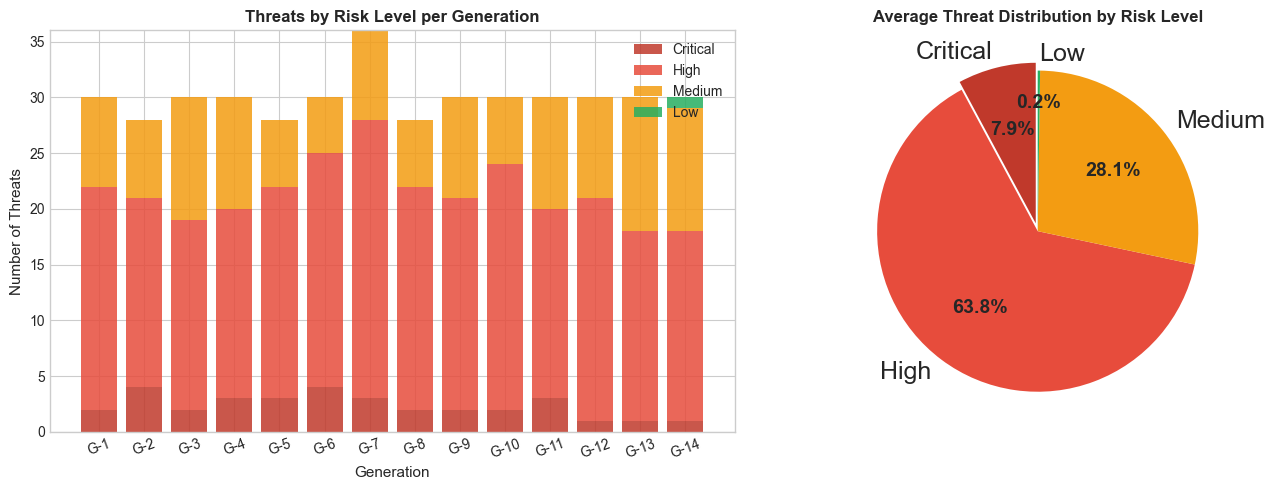

Avg Total Threats: 30.0


In [17]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
ax1 = axes[0]
df_sorted = df.sort_values("generation_name", key=lambda x: x.str.extract(r"(\d+)")[0].astype(int))
bottom = np.zeros(len(df_sorted))
colors = {"Critical": "#c0392b", "High": "#e74c3c", "Medium": "#f39c12", "Low": "#27ae60"}
for level in ["threats_critical", "threats_high", "threats_medium", "threats_low"]:
    label = level.replace("threats_", "").title()
    ax1.bar(df_sorted["generation_name"], df_sorted[level], bottom=bottom, label=label, color=colors[label], alpha=0.85)
    bottom += df_sorted[level].values
ax1.set_xlabel("Generation", fontsize=11)
ax1.set_ylabel("Number of Threats", fontsize=11)
ax1.set_title("Threats by Risk Level per Generation", fontsize=12, fontweight="bold")
ax1.legend(loc="upper right")
ax1.tick_params(axis="x", rotation=20)
ax2 = axes[1]
avg_threats = [df["threats_critical"].mean(), df["threats_high"].mean(), df["threats_medium"].mean(), df["threats_low"].mean()]
labels = ["Critical", "High", "Medium", "Low"]
colors_pie = [colors[l] for l in labels]
wedges, texts, autotexts = ax2.pie(avg_threats, labels=labels, colors=colors_pie, autopct="%1.1f%%", startangle=90, explode=[0.05, 0, 0, 0])
for text in texts:
    text.set_fontsize(18)
    print(text.get_text())
for autotext in autotexts:
    autotext.set_fontsize(14)
    autotext.set_fontweight("bold")
    if autotext.get_text() == "0.2%":
        autotext.set_position((autotext.get_position()[0], autotext.get_position()[1] + 0.2))
ax2.set_title("Average Threat Distribution by Risk Level", fontsize=12, fontweight="bold")
plt.tight_layout()
plt.savefig("chart_05_threat_analysis.png", dpi=150, bbox_inches="tight")
plt.show()
print(f'Avg Total Threats: {df["total_threats"].mean():.1f}')

### Chart 6: Security Aspects Coverage (STRIDE Categories)

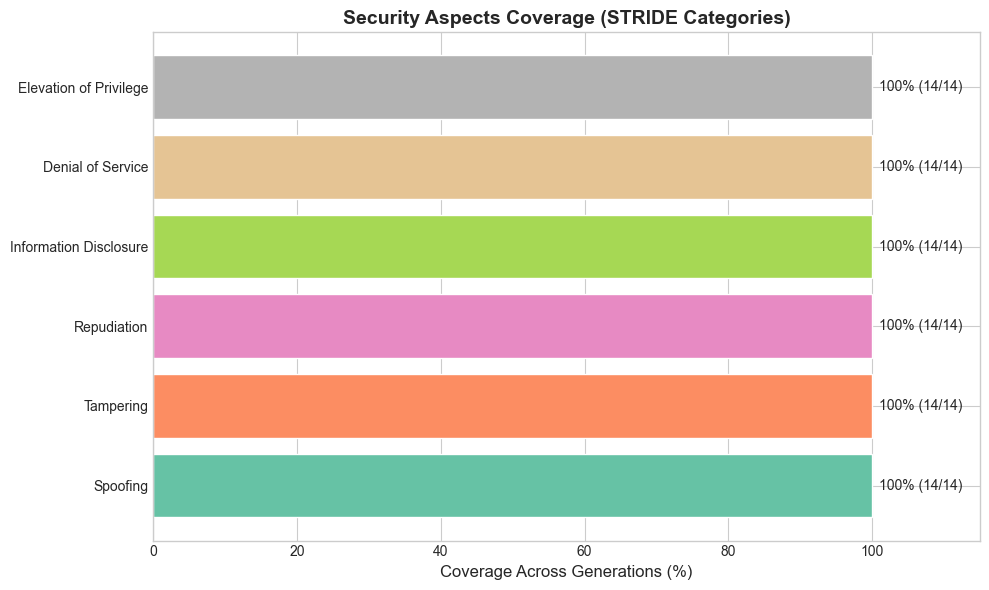

All 14 generations cover all 6 STRIDE threat categories.


In [9]:
core_categories = ["Spoofing", "Tampering", "Repudiation", "Information Disclosure", "Denial of Service", "Elevation of Privilege"]
category_counts = {}
for cat in core_categories:
    count = sum(1 for cats in df["threat_categories"] if pd.notna(cats) and cat in cats)
    category_counts[cat] = count
fig, ax = plt.subplots(figsize=(10, 6))
categories = list(category_counts.keys())
counts = list(category_counts.values())
percentages = [c / len(df) * 100 for c in counts]
colors = plt.cm.Set2(np.linspace(0, 1, len(categories)))
bars = ax.barh(categories, percentages, color=colors, edgecolor="white")
for bar, pct, cnt in zip(bars, percentages, counts):
    ax.text(pct + 1, bar.get_y() + bar.get_height() / 2, f"{pct:.0f}% ({cnt}/{len(df)})", va="center", fontsize=10)
ax.set_xlabel("Coverage Across Generations (%)", fontsize=12)
ax.set_title("Security Aspects Coverage (STRIDE Categories)", fontsize=14, fontweight="bold")
ax.set_xlim(0, 115)
plt.tight_layout()
plt.savefig("chart_06_security_aspects.png", dpi=150, bbox_inches="tight")
plt.show()
print(f"All {len(df)} generations cover all 6 STRIDE threat categories.")

---
## 6.1.2 Standards Compliance Validation

### Chart 7: Security Control Mappings by Standard

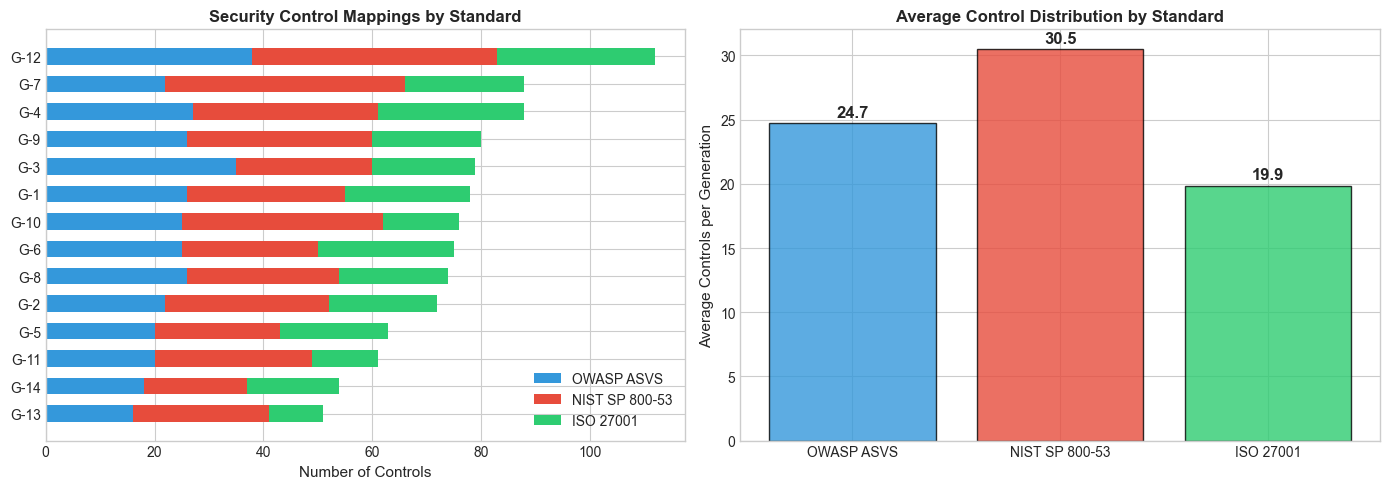

Total Controls: OWASP=346, NIST=427, ISO=278


In [10]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
ax1 = axes[0]
df_sorted = df.sort_values("total_controls", ascending=True)
x = np.arange(len(df_sorted))
width = 0.6
ax1.barh(x, df_sorted["owasp_controls"], height=width, label="OWASP ASVS", color="#3498db")
ax1.barh(x, df_sorted["nist_controls"], height=width, left=df_sorted["owasp_controls"], label="NIST SP 800-53", color="#e74c3c")
ax1.barh(
    x,
    df_sorted["iso_controls"],
    height=width,
    left=df_sorted["owasp_controls"] + df_sorted["nist_controls"],
    label="ISO 27001",
    color="#2ecc71",
)
ax1.set_yticks(x)
ax1.set_yticklabels(df_sorted["generation_name"])
ax1.set_xlabel("Number of Controls", fontsize=11)
ax1.set_title("Security Control Mappings by Standard", fontsize=12, fontweight="bold")
ax1.legend(loc="lower right")
ax2 = axes[1]
standards = ["OWASP ASVS", "NIST SP 800-53", "ISO 27001"]
avg_controls = [df["owasp_controls"].mean(), df["nist_controls"].mean(), df["iso_controls"].mean()]
colors = ["#3498db", "#e74c3c", "#2ecc71"]
bars = ax2.bar(standards, avg_controls, color=colors, edgecolor="black", alpha=0.8)
for bar, val in zip(bars, avg_controls):
    ax2.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f"{val:.1f}", ha="center", fontsize=12, fontweight="bold")
ax2.set_ylabel("Average Controls per Generation", fontsize=11)
ax2.set_title("Average Control Distribution by Standard", fontsize=12, fontweight="bold")
plt.tight_layout()
plt.savefig("chart_07_controls_by_standard.png", dpi=150, bbox_inches="tight")
plt.show()
print(f'Total Controls: OWASP={df["owasp_controls"].sum()}, NIST={df["nist_controls"].sum()}, ISO={df["iso_controls"].sum()}')

### Chart 8: Control Coverage Percentage

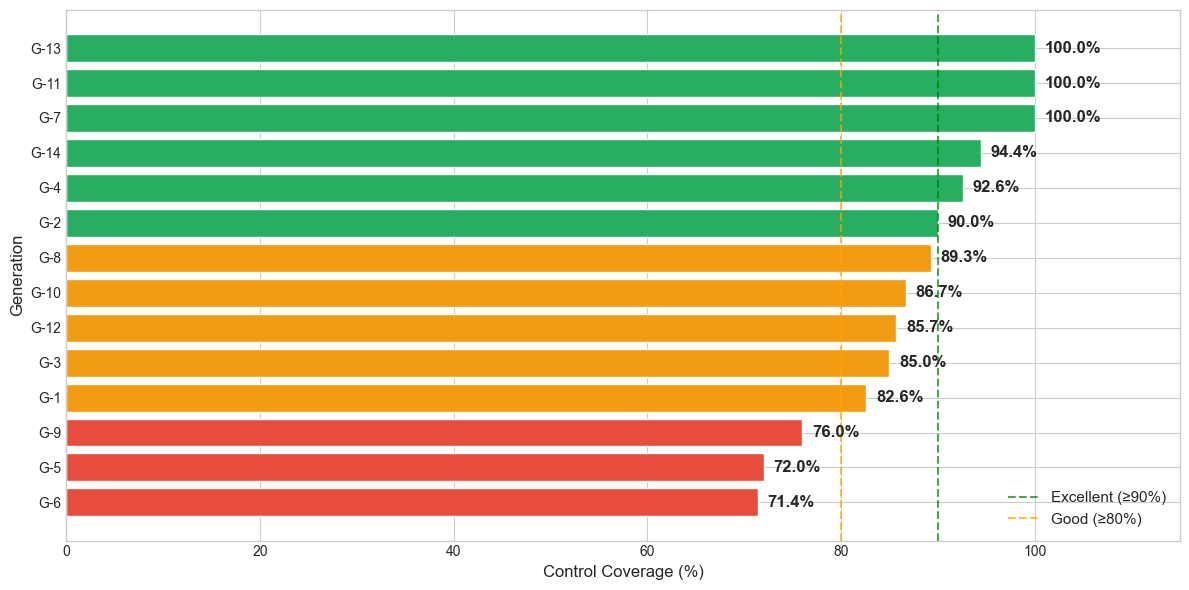

Mean Coverage: 87.6%
Generations ≥90%: 6/14


In [11]:
fig, ax = plt.subplots(figsize=(12, 6))
df_sorted = df.sort_values("control_coverage_pct", ascending=True)
colors = ["#27ae60" if pct >= 90 else "#f39c12" if pct >= 80 else "#e74c3c" for pct in df_sorted["control_coverage_pct"]]
bars = ax.barh(df_sorted["generation_name"], df_sorted["control_coverage_pct"], color=colors, edgecolor="white")
for bar, pct in zip(bars, df_sorted["control_coverage_pct"]):
    ax.text(pct + 1, bar.get_y() + bar.get_height() / 2, f"{pct:.1f}%", va="center", fontsize=12, fontweight="bold")
ax.set_xlabel("Control Coverage (%)", fontsize=12)
ax.set_ylabel("Generation", fontsize=12)
# ax.set_title("Compliance Coverage: Requirements with Security Control Mapping", fontsize=14, fontweight="bold")
ax.set_xlim(0, 115)
ax.axvline(x=90, color="green", linestyle="--", alpha=0.7, label="Excellent (≥90%)")
ax.axvline(x=80, color="orange", linestyle="--", alpha=0.7, label="Good (≥80%)")
ax.legend(loc="lower right", fontsize=11)
plt.tight_layout()
plt.savefig("chart_08_control_coverage.png", dpi=150, bbox_inches="tight")
plt.show()
print(f'Mean Coverage: {df["control_coverage_pct"].mean():.1f}%')
print(f'Generations ≥90%: {(df["control_coverage_pct"] >= 90).sum()}/{len(df)}')

### Chart 9: OWASP ASVS Level Distribution

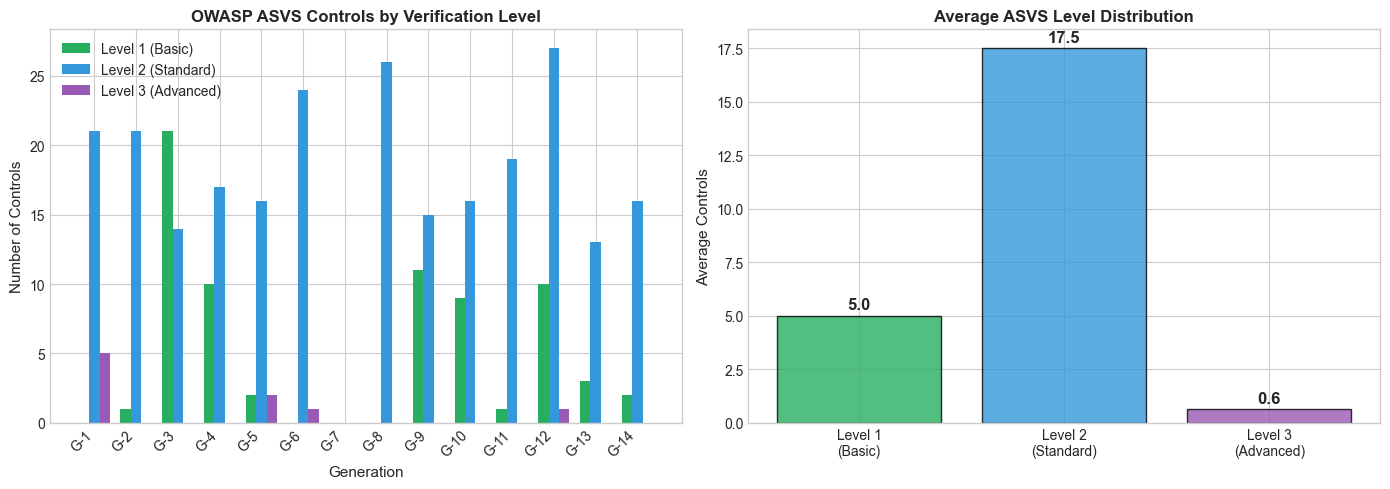

L1: 5.0, L2: 17.5, L3: 0.6


In [19]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
ax1 = axes[0]
df_sorted = df.sort_values("generation_name", key=lambda x: x.str.extract(r"(\d+)")[0].astype(int))
x = np.arange(len(df_sorted))
width = 0.25
ax1.bar(x - width, df_sorted["asvs_l1_controls"], width, label="Level 1 (Basic)", color="#27ae60")
ax1.bar(x, df_sorted["asvs_l2_controls"], width, label="Level 2 (Standard)", color="#3498db")
ax1.bar(x + width, df_sorted["asvs_l3_controls"], width, label="Level 3 (Advanced)", color="#9b59b6")
ax1.set_xlabel("Generation", fontsize=11)
ax1.set_ylabel("Number of Controls", fontsize=11)
ax1.set_title("OWASP ASVS Controls by Verification Level", fontsize=12, fontweight="bold")
ax1.set_xticks(x)
ax1.set_xticklabels(df_sorted["generation_name"], rotation=45, ha="right")
ax1.legend()
ax2 = axes[1]
levels = ["Level 1\n(Basic)", "Level 2\n(Standard)", "Level 3\n(Advanced)"]
avg_levels = [df["asvs_l1_controls"].mean(), df["asvs_l2_controls"].mean(), df["asvs_l3_controls"].mean()]
colors = ["#27ae60", "#3498db", "#9b59b6"]
bars = ax2.bar(levels, avg_levels, color=colors, edgecolor="black", alpha=0.8)
for bar, val in zip(bars, avg_levels):
    ax2.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.3, f"{val:.1f}", ha="center", fontsize=12, fontweight="bold")
ax2.set_ylabel("Average Controls", fontsize=11)
ax2.set_title("Average ASVS Level Distribution", fontsize=12, fontweight="bold")
plt.tight_layout()
plt.savefig("chart_09_asvs_levels.png", dpi=150, bbox_inches="tight")
plt.show()
print(f'L1: {df["asvs_l1_controls"].mean():.1f}, L2: {df["asvs_l2_controls"].mean():.1f}, L3: {df["asvs_l3_controls"].mean():.1f}')

### Chart 10: Cross-Standard Consistency

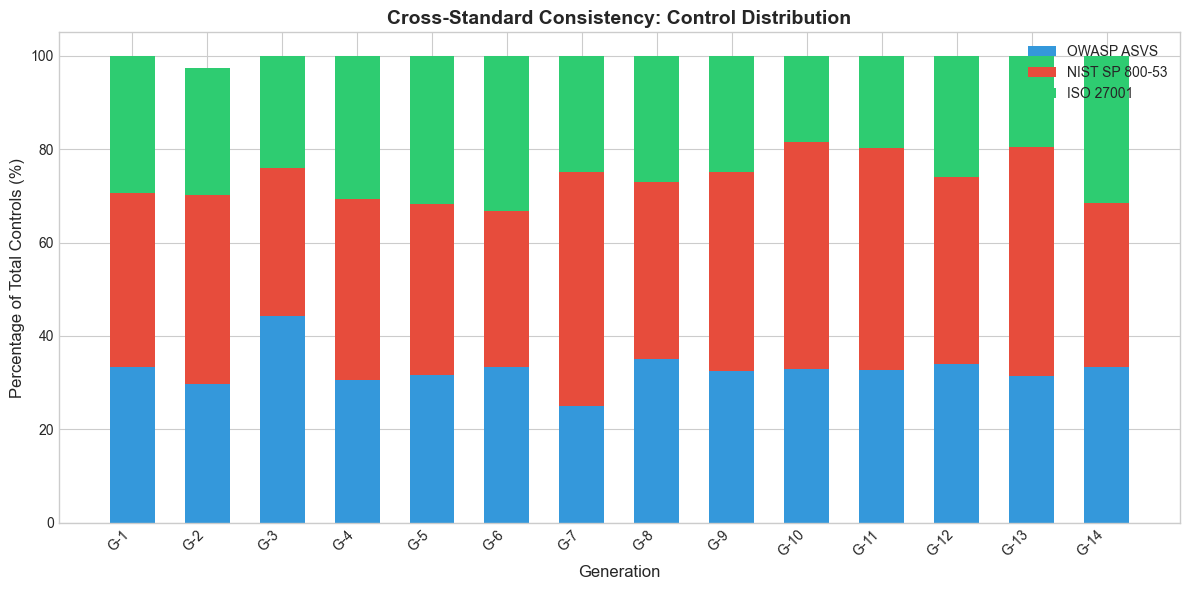

Cross-Standard Distribution: OWASP=32.9%, NIST=40.6%, ISO=26.3%


In [20]:
fig, ax = plt.subplots(figsize=(12, 6))
df["owasp_pct"] = df["owasp_controls"] / df["total_controls"] * 100
df["nist_pct"] = df["nist_controls"] / df["total_controls"] * 100
df["iso_pct"] = df["iso_controls"] / df["total_controls"] * 100
df_sorted = df.sort_values("generation_name", key=lambda x: x.str.extract(r"(\d+)")[0].astype(int))
x = np.arange(len(df_sorted))
width = 0.6
ax.bar(x, df_sorted["owasp_pct"], width, label="OWASP ASVS", color="#3498db")
ax.bar(x, df_sorted["nist_pct"], width, bottom=df_sorted["owasp_pct"], label="NIST SP 800-53", color="#e74c3c")
ax.bar(x, df_sorted["iso_pct"], width, bottom=df_sorted["owasp_pct"] + df_sorted["nist_pct"], label="ISO 27001", color="#2ecc71")
ax.set_xlabel("Generation", fontsize=12)
ax.set_ylabel("Percentage of Total Controls (%)", fontsize=12)
ax.set_title("Cross-Standard Consistency: Control Distribution", fontsize=14, fontweight="bold")
ax.set_xticks(x)
ax.set_xticklabels(df_sorted["generation_name"], rotation=45, ha="right")
ax.legend(loc="upper right")
ax.set_ylim(0, 105)
plt.tight_layout()
plt.savefig("chart_10_cross_standard.png", dpi=150, bbox_inches="tight")
plt.show()
print(
    f'Cross-Standard Distribution: OWASP={df["owasp_pct"].mean():.1f}%, NIST={df["nist_pct"].mean():.1f}%, ISO={df["iso_pct"].mean():.1f}%'
)

### Chart 11: Critical Controls Identification

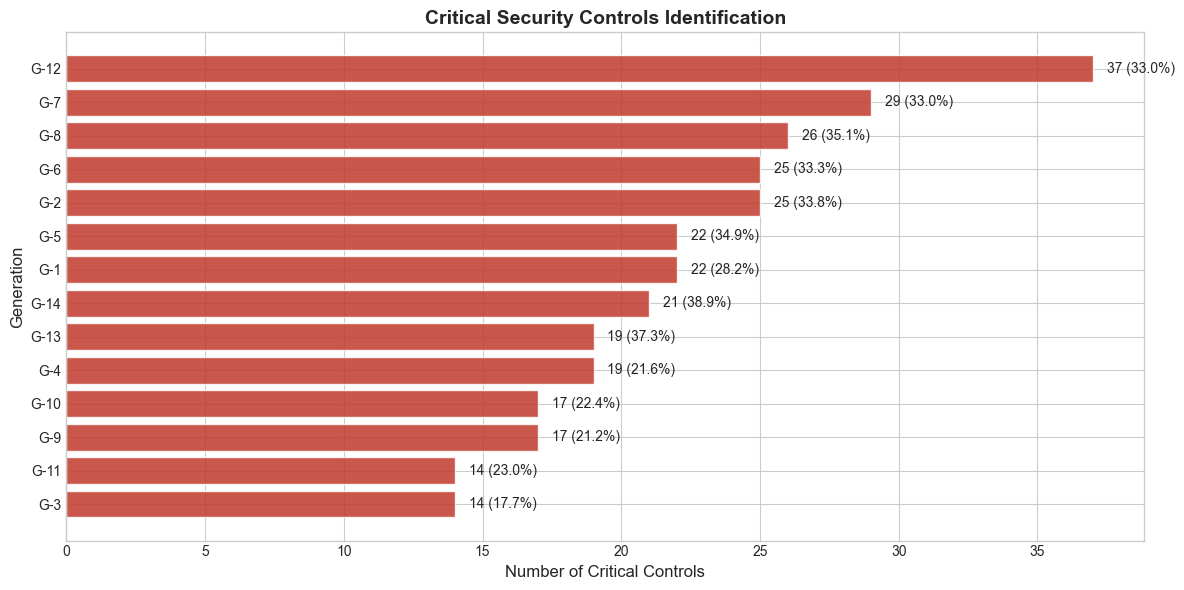

Mean Critical Controls: 21.9


In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
df_sorted = df.sort_values("critical_controls", ascending=True)
df_sorted["critical_pct"] = df_sorted["critical_controls"] / df_sorted["total_controls"] * 100
bars = ax.barh(df_sorted["generation_name"], df_sorted["critical_controls"], color="#c0392b", edgecolor="white", alpha=0.85)
for bar, cnt, pct in zip(bars, df_sorted["critical_controls"], df_sorted["critical_pct"]):
    ax.text(cnt + 0.5, bar.get_y() + bar.get_height() / 2, f"{cnt} ({pct:.1f}%)", va="center", fontsize=10)
ax.set_xlabel("Number of Critical Controls", fontsize=12)
ax.set_ylabel("Generation", fontsize=12)
ax.set_title("Critical Security Controls Identification", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.savefig("chart_11_critical_controls.png", dpi=150, bbox_inches="tight")
plt.show()
print(f'Mean Critical Controls: {df["critical_controls"].mean():.1f}')

---
## Summary Statistics

In [15]:
summary_data = {
    "Metric": [
        "Overall Score",
        "Completeness",
        "Consistency",
        "Correctness",
        "Implementability",
        "Alignment",
        "Total Requirements",
        "Threat Coverage %",
        "Control Coverage %",
        "Test Coverage %",
        "Total Threats",
        "Total Controls",
        "OWASP Controls",
        "NIST Controls",
        "ISO Controls",
        "Critical Controls",
    ],
    "Mean": [
        df["overall_score"].mean(),
        df["completeness"].mean(),
        df["consistency"].mean(),
        df["correctness"].mean(),
        df["implementability"].mean(),
        df["alignment"].mean(),
        df["total_requirements"].mean(),
        df["threat_coverage_pct"].mean(),
        df["control_coverage_pct"].mean(),
        df["test_coverage_pct"].mean(),
        df["total_threats"].mean(),
        df["total_controls"].mean(),
        df["owasp_controls"].mean(),
        df["nist_controls"].mean(),
        df["iso_controls"].mean(),
        df["critical_controls"].mean(),
    ],
    "Std": [
        df["overall_score"].std(),
        df["completeness"].std(),
        df["consistency"].std(),
        df["correctness"].std(),
        df["implementability"].std(),
        df["alignment"].std(),
        df["total_requirements"].std(),
        df["threat_coverage_pct"].std(),
        df["control_coverage_pct"].std(),
        df["test_coverage_pct"].std(),
        df["total_threats"].std(),
        df["total_controls"].std(),
        df["owasp_controls"].std(),
        df["nist_controls"].std(),
        df["iso_controls"].std(),
        df["critical_controls"].std(),
    ],
    "Min": [
        df["overall_score"].min(),
        df["completeness"].min(),
        df["consistency"].min(),
        df["correctness"].min(),
        df["implementability"].min(),
        df["alignment"].min(),
        df["total_requirements"].min(),
        df["threat_coverage_pct"].min(),
        df["control_coverage_pct"].min(),
        df["test_coverage_pct"].min(),
        df["total_threats"].min(),
        df["total_controls"].min(),
        df["owasp_controls"].min(),
        df["nist_controls"].min(),
        df["iso_controls"].min(),
        df["critical_controls"].min(),
    ],
    "Max": [
        df["overall_score"].max(),
        df["completeness"].max(),
        df["consistency"].max(),
        df["correctness"].max(),
        df["implementability"].max(),
        df["alignment"].max(),
        df["total_requirements"].max(),
        df["threat_coverage_pct"].max(),
        df["control_coverage_pct"].max(),
        df["test_coverage_pct"].max(),
        df["total_threats"].max(),
        df["total_controls"].max(),
        df["owasp_controls"].max(),
        df["nist_controls"].max(),
        df["iso_controls"].max(),
        df["critical_controls"].max(),
    ],
}
summary = pd.DataFrame(summary_data)
summary.to_csv("summary_statistics.csv", index=False)
print("Summary Statistics saved to summary_statistics.csv")
summary.round(2)

Summary Statistics saved to summary_statistics.csv


,Metric,Mean,Std,Min,Max
0,Overall Score,0.85,0.04,0.79,0.92
1,Completeness,0.81,0.07,0.72,0.92
2,Consistency,0.91,0.06,0.75,0.98
3,Correctness,0.88,0.03,0.84,0.90
4,Implementability,0.76,0.06,0.65,0.86
5,Alignment,0.89,0.05,0.78,0.95
6,Total Requirements,24.07,5.21,16.00,35.00
7,Threat Coverage %,98.60,2.92,90.91,100.00
8,Control Coverage %,87.55,9.68,71.40,100.00
9,Test Coverage %,100.00,0.00,100.00,100.00


In [16]:
print("=" * 60)
print("CHARTS GENERATED")
print("=" * 60)
print("\nSection 6.1.1 - Translation Quality Assessment:")
print("  - chart_01_overall_scores.png")
print("  - chart_02_dimension_scores.png")
print("  - chart_03_coverage_metrics.png")
print("  - chart_04_breadth_vs_depth.png")
print("  - chart_05_threat_analysis.png")
print("  - chart_06_security_aspects.png")
print("\nSection 6.1.2 - Standards Compliance Validation:")
print("  - chart_07_controls_by_standard.png")
print("  - chart_08_control_coverage.png")
print("  - chart_09_asvs_levels.png")
print("  - chart_10_cross_standard.png")
print("  - chart_11_critical_controls.png")

CHARTS GENERATED

Section 6.1.1 - Translation Quality Assessment:
  - chart_01_overall_scores.png
  - chart_02_dimension_scores.png
  - chart_03_coverage_metrics.png
  - chart_04_breadth_vs_depth.png
  - chart_05_threat_analysis.png
  - chart_06_security_aspects.png

Section 6.1.2 - Standards Compliance Validation:
  - chart_07_controls_by_standard.png
  - chart_08_control_coverage.png
  - chart_09_asvs_levels.png
  - chart_10_cross_standard.png
  - chart_11_critical_controls.png
